## Analyzing Fraud and Not Fraud Transactions by Type and Amount

1. Univariate Analysis 

- How many transactions of fraud are there?
- How many type of transactions are there and which one is used the most?
- Fraud vs Not Fraud based on the type of transaction?

2. Bivariate Analysis
- Fraud transactions vs Not Fraud transcations over time?
- What's the difference in transaction amount by type of transactions? 
- Fraud type by transaction amount?

3. Multivariate Analysis 
- What is the fraud probablity by transaction amount? 
- What is the correlation between amounts, balances and fraud? 

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [95]:
financial_df = pd.read_csv("/Users/sa17/Desktop/financial-fraud/financial-fraud-analysis/data/raw/log.csv")

financial_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


● Step: A unit of time that represents hours in the dataset. Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) 

● Type: The type of transaction 

● Amount: The amount of money transferred 

● NameOrig: The origin account name

● OldBalanceOrg: The origin accounts balance before the transaction

 ● NewBalanceOrg: The origin accounts balance after the transaction 
● NameDest: The destination account name 

● OldbalanceDest: The destination accounts balance before the transaction

● NewbalanceDest: The destination accounts balance after the transaction 

● IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 

● IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 

In [96]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [97]:
financial_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [98]:
financial_df.shape

(6362620, 11)

In [99]:
financial_df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [100]:
fraud = financial_df[financial_df["isFraud"] == 1]

fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [101]:
notfraud = financial_df[financial_df["isFraud"] == 0]

notfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


## 1. Univariate Analysis

How many transactions of fraud are there?

In [8]:
fraud_count = financial_df["isFraud"].value_counts().to_frame()

fraud_count

,count
isFraud,
0,6354407
1,8213


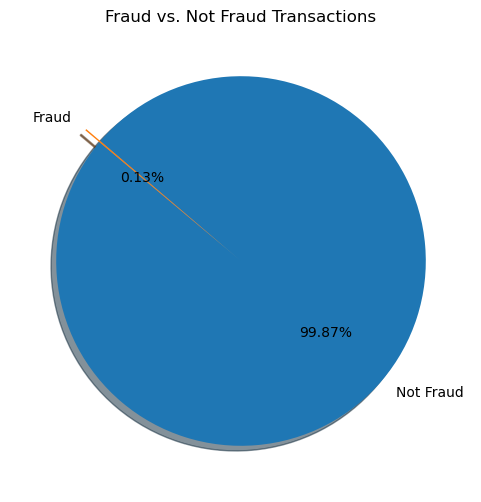

In [91]:
labels = ["Not Fraud", "Fraud"] 
sizes = [6354407, 8213]  

# Pie Chart Fraud vs Not Fraud
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, explode=(0, 0.1), autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Fraud vs. Not Fraud Transactions")
plt.show()

Out of 6 million transactions less than 1% of transactions are fraud 

How many type of transactions are there and which one is used the most?

In [10]:
type_count = financial_df['type'].value_counts()

type_count

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

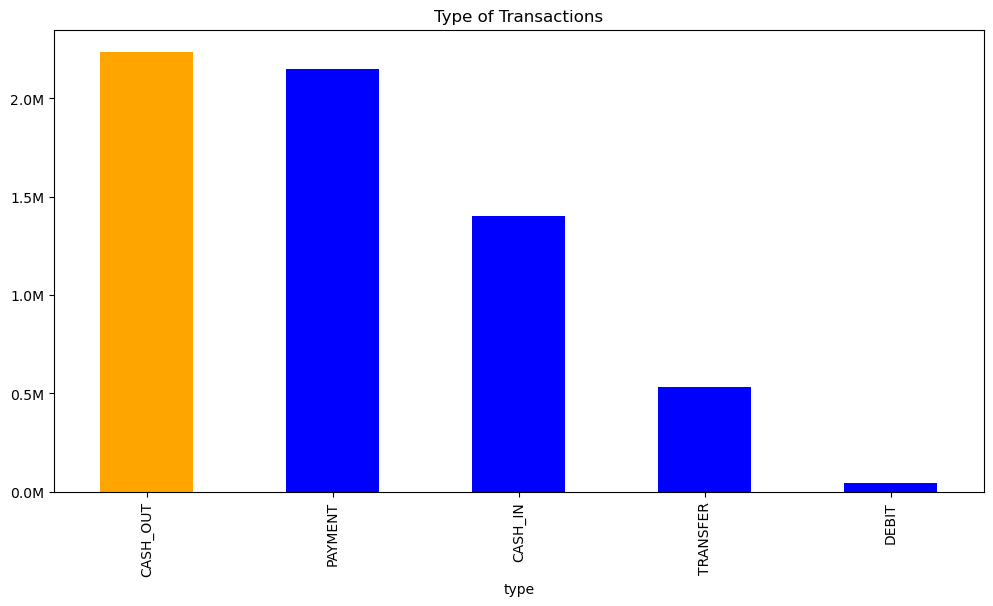

In [102]:
max_type = type_count.max()

# Assign colors: orange for the max value, blue for others
colors = ["orange" if count == max_type else "blue" for count in type_count]

# Plot the types of transcations
plt.figure(figsize=(12, 6))
type_count.plot(kind='bar', color=colors)
plt.title("Type of Transactions")

# Formatting y-axis to display numbers in millions
formatter = FuncFormatter(lambda x, pos: f"{x / 1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

There are 5 different type of transactions and cash out transactions are used the most.

Which transactions appear in fraud cases?

In [14]:
type_fraud = fraud["type"].value_counts().to_frame()

type_fraud

,count
type,
CASH_OUT,4116
TRANSFER,4097


Which transactions do not appear in fraud cases?

In [16]:
type_notfraud = notfraud["type"].value_counts().to_frame()

type_notfraud

,count
type,
CASH_OUT,2233384
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,528812
DEBIT,41432


Fraud vs Not Fraud based on the type of transaction?

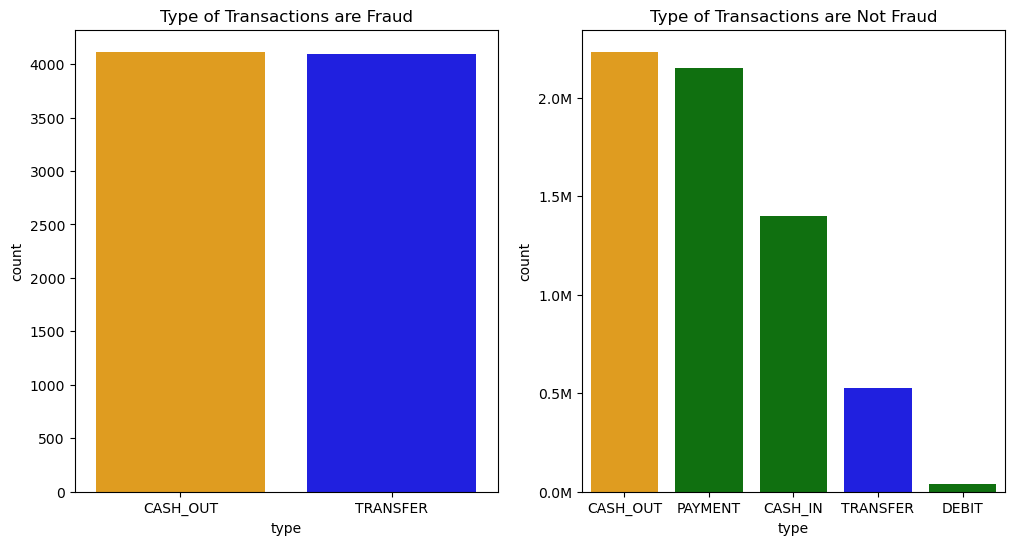

In [106]:
# Define custom colors
custom_palette = {
    "CASH_OUT": "orange", 
    "TRANSFER": "blue",  
    "PAYMENT": "green",   
    "CASH_IN": "green",   
    "DEBIT": "green",     
}
plt.figure(figsize=(12, 6))

# Type of Transactions that are Fraud
plt.subplot(1, 2, 1)
sns.barplot(data=type_fraud, x="type", y="count", hue="type", palette=custom_palette)
plt.title("Type of Transactions are Fraud")

# Type of Transactions that are not Fraud
plt.subplot(1, 2, 2)
sns.barplot(data=type_notfraud, x="type", y="count", hue="type", palette=custom_palette)
plt.title("Type of Transactions are Not Fraud")

formatter = FuncFormatter(lambda x, pos: f"{x / 1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Only cash out and transfer transactions are fraud and its a small number compared to the amount of transactions that are not fraud. 

 ## 2. Bivariate Analysis

Fraud transactions vs Not Fraud transcations over time?

In [116]:
fraud_count = fraud.groupby("step").size().reset_index(name="count")

fraud_count

,step,count
0,1,16
1,2,8
2,3,4
3,4,10
4,5,6
...,...,...
736,739,10
737,740,6
738,741,22
739,742,14


In [117]:
notfraud_count = notfraud.groupby("step").size().reset_index(name="count")

notfraud_count

,step,count
0,1,2692
1,2,1006
2,3,548
3,4,555
4,5,659
...,...,...
418,714,667
419,715,1869
420,716,132
421,717,620


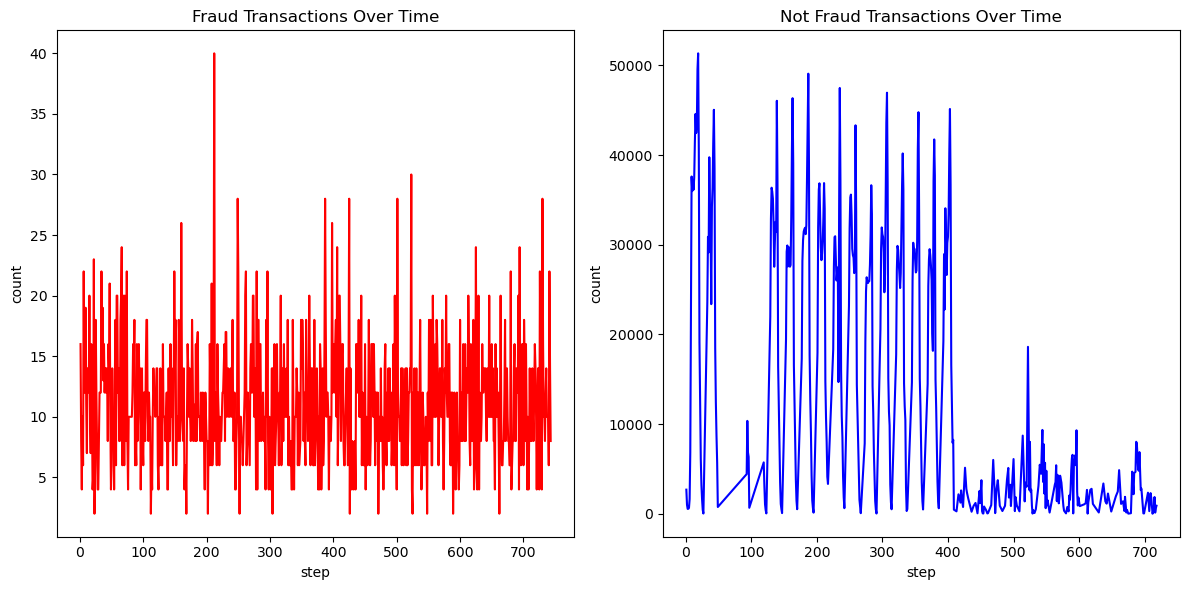

In [118]:
plt.figure(figsize=(12, 6))

# Fraud transactions over time
plt.subplot(1, 2, 1)
sns.lineplot(data=fraud_count, x="step", y="count", color="red")
plt.title("Fraud Transactions Over Time")

# Not fraud transactions over time
plt.subplot(1, 2, 2)
sns.lineplot(data=notfraud_count, x="step", y="count", color="blue")
plt.title("Not Fraud Transactions Over Time")

plt.tight_layout()
plt.show()

Fraud transactions remain relatively steady, indicating consistent fraudulent activity over time.

Non-fraud transactions experience high variability and a dramatic decrease after step 400.

The disparity in counts (fraud in the tens, non-fraud in the tens of thousands) shows that fraud is a relatively small fraction of total transactions.

What's the difference in transaction amount by type of transactions? 

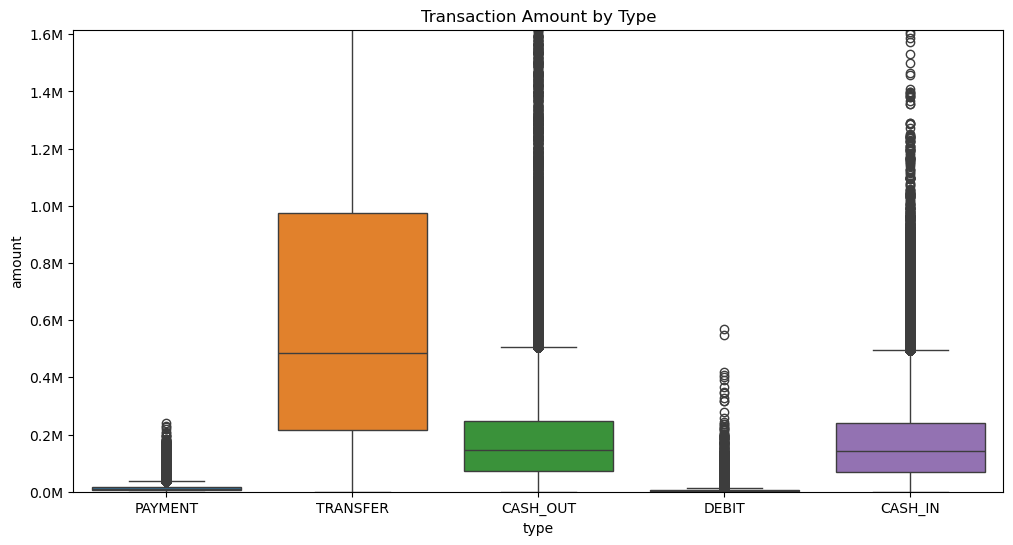

In [107]:
# Boxplot transcation amount by type
plt.figure(figsize=(12, 6))

sns.boxplot(data=financial_df, x="type", y="amount", hue="type")
plt.title("Transaction Amount by Type")

# Focus on 99% range to avoid extreme values
plt.ylim(0, financial_df["amount"].quantile(0.99)) 

formatter = FuncFormatter(lambda x, pos: f"{x / 1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Transfer transactions have the highest median and the widest range, indicating variability in the amounts. Payment and debit transactions generally involve smaller amounts with a few exceptions. Cash in and cash out transactions are more moderate in size but still show a number of large outliers.

Fraud type by transaction amount?

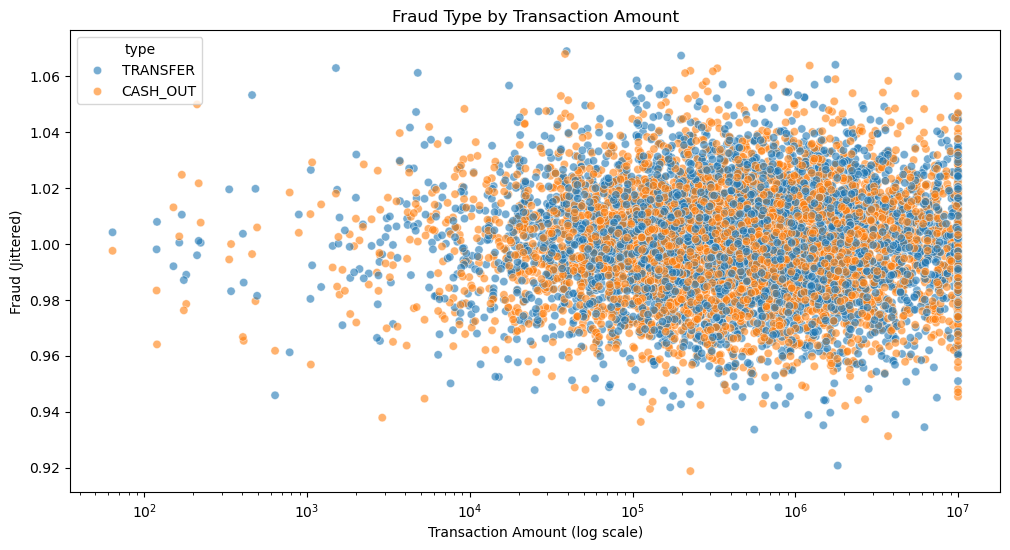

In [55]:
plt.figure(figsize=(12, 6))

# The jittered values around 1.00 are used to visually separate overlapping points, making it easier to see the distribution.
y_jitter = np.random.normal(loc=1, scale=0.02, size=len(fraud))

# Shows the transaction amount on a logarithmic scale, which helps manage the wide range of values and highlights patterns more clearly
plt.xscale("log")

# Scatterplot fraud type by transaction amount
sns.scatterplot(data=fraud,x="amount", y=y_jitter, alpha=0.6, hue="type")
plt.title("Fraud Type by Transaction Amount")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Fraud (Jittered)")

plt.show()

The plot indicates that fraudulent transactions are common in both transfer and cash out types and tend to cluster at higher transaction amounts. This could imply that large transactions are scrutinized more or are inherently riskier.

## 3. Multivariate Analysis

What is the fraud probablity by transaction amount? 

/var/folders/8s/6z8k89ls5219_662hzy190h80000gn/T/ipykernel_67439/2372284457.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_prob = financial_df.groupby("amount_bin")["isFraud"].mean().reset_index()


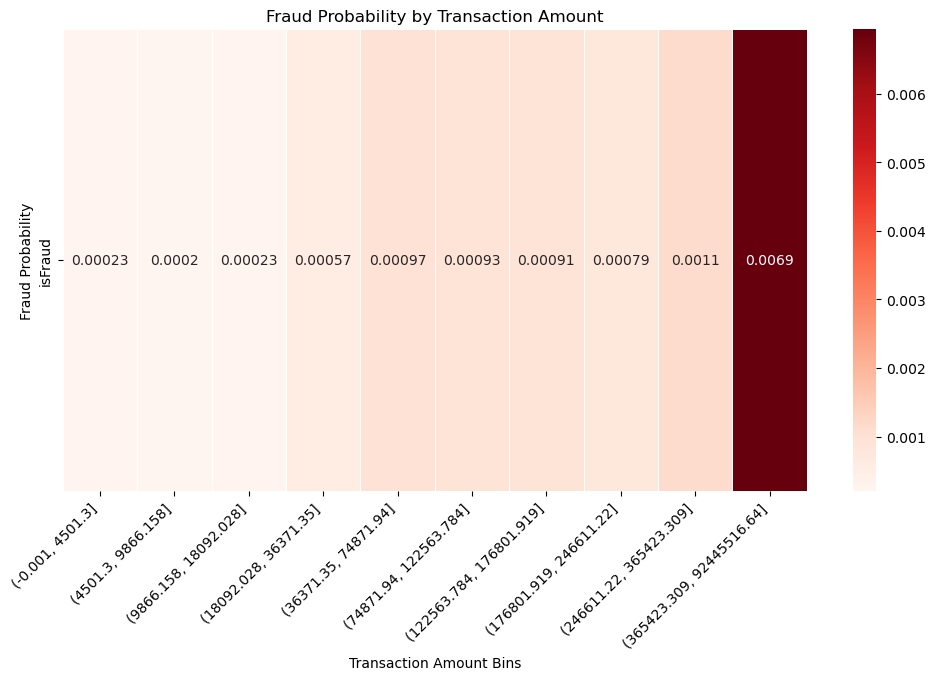

In [44]:
# Bin transaction amounts
financial_df["amount_bin"] = pd.qcut(financial_df["amount"], q=10, duplicates="drop")

# Calculate fraud probability per bin
fraud_prob = financial_df.groupby("amount_bin")["isFraud"].mean().reset_index()

# Convert bins to string for better readability
fraud_prob["amount_bin"] = fraud_prob["amount_bin"].astype(str)

# Heatmap fraud probablity by transaction amount
plt.figure(figsize=(12, 6))
sns.heatmap(fraud_prob.set_index("amount_bin").T, annot=True, cmap="Reds", linewidths=0.5)

plt.title("Fraud Probability by Transaction Amount")
plt.xlabel("Transaction Amount Bins")
plt.ylabel("Fraud Probability")
plt.xticks(rotation=45, ha="right")
plt.show()

Low Transaction Amounts:
The probability of fraud is extremely low for transaction amounts in the lower bins, around 0.0002 to 0.00023.
This means smaller transactions are rarely flagged as fraudulent.

Mid-Range Transaction Amounts:
As the transaction amounts increase, there is a slight increase in fraud probability. For instance:
Around 0.00057 for amounts in the 18,092 to 36,371 range.
Around 0.00093 for amounts in the 74,871 to 122,563 range.

High Transaction Amounts:
There is a significant increase in fraud probability for transactions in the higher bins.
The highest bin (with transaction amounts ranging from 365,423 to 924,455) shows a much higher probability of 0.0069.
This indicates that high-value transactions are significantly more likely to be fraudulent compared to low-value ones.

Fraudulent transactions are more likely to occur when the transaction amount is high.
This suggests that fraud detection systems should focus more on high-value transactions, as they pose a greater risk.
The sharp increase in fraud probability at the highest transaction amounts could be due to fraudsters targeting larger sums to maximize their gains.

What is the correlation between amounts, balances and fraud? 

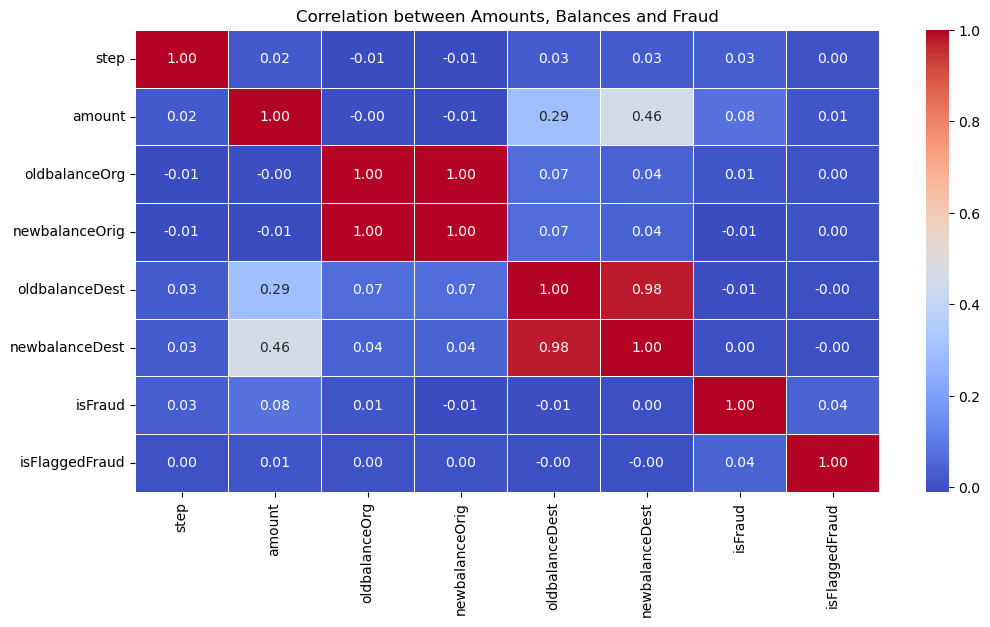

In [93]:
# Select only numerical columns for correlation
numeric_cols = financial_df.select_dtypes(include=["number"]).columns
corr = financial_df[numeric_cols].corr()

# Heatmap of correlation 
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Amounts, Balances and Fraud")
plt.show()


The strong correlation between old and new balances for both origin and destination accounts indicates that the transactions do not significantly alter the balances in most cases.

The moderate positive correlation between the transaction amount and the destination balances suggests that large transfers tend to increase the balance of the receiving account.

The weak correlation between amount and isFraud implies that fraud can occur across different transaction sizes, although slightly more often with higher amount.